# Student Database System with File Handling #

This project showcases how object-oriented programming (OOP) principles can be applied to build a simple student management system.

The StudentManagement class is designed to handle:

- Data Persistence: Creates and stores student records in a CSV file for long-term use.
- Automation: Automatically assigns unique IDs to each student added.
- Data Retrieval: Uses Pandas to efficiently query and analyze student records.

By combining Python’s built-in csv module with the power of Pandas, this system demonstrates a scalable and reusable approach for managing structured data.

In [150]:
import csv
import pandas

class StudentManagement:
    def __init__(self, file_name):
        self.file_name = file_name
        self.create_file()
        
    def create_file(self):
        try:
            with open(self.file_name + '.csv', 'x', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['id','first_name','last_name','age'])
        except FileExistsError:
            pass

    def add_student(self, first_name, last_name, age):
        id = self.get_row_count() + 1
        with open(self.file_name + '.csv', 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([id, first_name, last_name, age])

    def get_row_count(self):
        with open(self.file_name + '.csv', 'r') as file:
            reader = csv.reader(file)
            row_count = len(list(reader)) - 1
            return row_count        

    def get_student(self, name):
        students_df = pd.read_csv(self.file_name + '.csv')
        student_check = len(students_df[students_df['first_name'] == name.title().strip()])
        if student_check == 0:
            return "Student not found"
        else:
            return students_df[students_df['first_name'] == name]

## Generating Rows to Add into CSV ##

After initializing the **StudentManagement** class with the filename **students**, new student records can be added directly into the system using the **add_student()** method. Each call inserts a new row into the CSV file with an **auto-generated unique ID.**

In [142]:
s = StudentManagement('students')

### 📌 Prompt Used to Generate the Data

These rows were **AI-generated by ChatGPT** to demonstrate how records can be added for multiple students. They serve as sample data that can easily be uncommented and executed to populate the CSV file with student records.

The following prompt was used to generate these sample student entries:

> “create example first name, last name and age in below format. create 10 of them.  
> s.add_student('Jack','Willson',33)”

This makes the notebook reproducible and transparent, while also showing the workflow for generating realistic **test data** when building projects.


## Selecting a Student

The **get_student()** method allows you to search for a student by their first name in the CSV file.

**What happens:**

1- Reads the CSV file using Pandas.

2- Checks if a student with the first name "Sarah" exists.

3- Returns either:

- A dataframe with the matching record(s), or

- "Student not found" if no record exists.

**Key Benefits:**

- Efficient lookup of individual students.

- Handles cases where a student may not exist.

- Demonstrates OOP + Pandas integration for data management.

In [152]:
s.get_student('Sarah')

,id,first_name,last_name,age
95,96,Sarah,Bailey,24


In [153]:
s.get_student('NoName')

'Student not found'

### Visualizing Student Age Distribution and Outliers

This section demonstrates how to **explore the distribution of student ages** and detect potential outliers using **a boxplot** combined with **percentiles**. The code integrates **Pandas, NumPy**, and **Matplotlib** to provide both statistical insight and a visual representation.

#### Loading Data
```df = pd.read_csv('students.csv')```

- Reads student records from the CSV file into a Pandas DataFrame.

- The age column will be analyzed to explore the distribution and detect outliers.

#### Creating a Boxplot

- Creates a horizontal boxplot of student ages.

- patch_artist=True gives the boxes a filled style for better visualization.

#### Calculating Min, Max and Percentiles
- Computes the minimum and maximum ages in the dataset.

- Calculates the 25th, 50th (median), and 75th percentiles to understand the central tendency and spread.

#### Adding Percentile Labels to Plot
- **twiny()** creates a second x-axis to display percentiles visually.

- Labels 25%, 50%, 75% correspond to the quartiles, making it easy to interpret the boxplot.

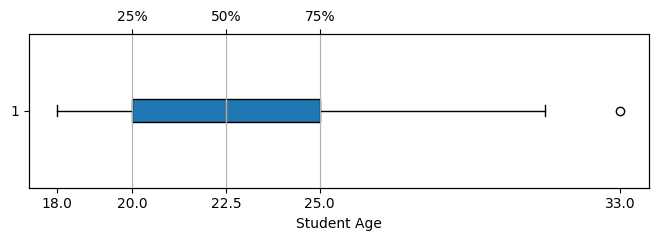

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('students.csv')

fig, ax1 = plt.subplots(figsize=(8,2))
ax1.boxplot(df['age'], patch_artist=True, orientation='horizontal')
ax1.set_xlabel('Student Age')

min_value = df['age'].min()
max_value = df['age'].max()

percentiles = [25,50,75]
percentile_values = np.percentile(df['age'], percentiles)

ax1.set_xticks([min_value,q1,median,q3, max_value])
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([q1,median,q3])
ax2.set_xticklabels([f'{p}%' for p in percentiles])

plt.grid(True)
plt.show()


## Data Exploration: Quartiles, Median, and Outlier Thresholds ##

This section demonstrates how to calculate **key statistical metrics** for the **age column** in the student dataset and determine potential outliers using **the IQR method.**

- **Q1 (25th percentile):** The age below which 25% of students fall.

- **Median (50th percentile):** The middle value of the age distribution.

- **Q3 (75th percentile):** The age below which 75% of students fall.

- **IQR (Interquartile Range):** Measures the spread of the middle 50% of ages.

In [139]:
q1 = np.percentile(df['age'],25)
median = np.percentile(df['age'],50)
q3 = np.percentile(df['age'],75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print(f'Q1: {q1}\nQ3: {q3}\nMedian: {median}\nIQR: {iqr}\nLower: {lower}\nUpper: {upper}')

Q1: 20.0
Q3: 25.0
Median: 22.5
IQR: 5.0
Lower: 12.5
Upper: 32.5


## Identifying Outliers in Student Ages ## 

Once we have calculated the **IQR-based lower and upper limits**, we can filter the dataset to highlight students whose ages are considered outliers.

- Quickly identifies students with unusually low or high ages.

- Helps in data cleaning, validation, and anomaly detection.

In [138]:
df[(df['age'] <= lower) | (df['age'] >= upper)]

,id,first_name,last_name,age
0,1,Ihsan,Turkmen,33
